In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
data = pd.read_csv("Fraud_check.csv")

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data["Fraud_check"] = data["Taxable.Income"].apply(lambda x:"Risky" if x<=30000  else "Good")
#using lambda fuction for convert into catagorical data in condition method

In [7]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_check
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


<Axes: xlabel='Fraud_check', ylabel='count'>

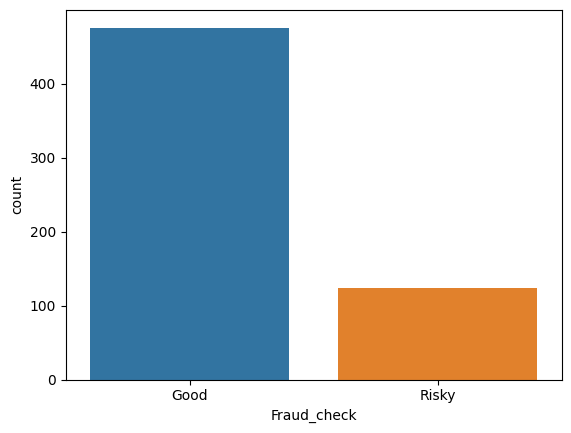

In [8]:
sns.countplot(x=data["Fraud_check"])

In [9]:
x= data.drop("Fraud_check",axis=1)

In [10]:
y=data["Fraud_check"]

In [11]:
x.shape,y.shape

((600, 6), (600,))

In [12]:
col = x.select_dtypes("object")

In [13]:
col.head()

,Undergrad,Marital.Status,Urban
0,NO,Single,YES
1,YES,Divorced,YES
2,NO,Married,YES
3,YES,Single,YES
4,NO,Married,NO


In [14]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
for i in col.columns:
  x[i] = label_encoder.fit_transform(x[i])
  #data preprocessing convert catagorical into numerical

In [16]:
x.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
#splt the test &train data with 30% test data

Model Creation

In [18]:
model = RandomForestClassifier(n_estimators=150,max_features=5)

In [19]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=150)

In [20]:
y_predict = model.predict(x_test)

In [21]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       138
       Risky       1.00      1.00      1.00        42

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [22]:
cm = confusion_matrix(y_test,y_predict)

<Axes: >

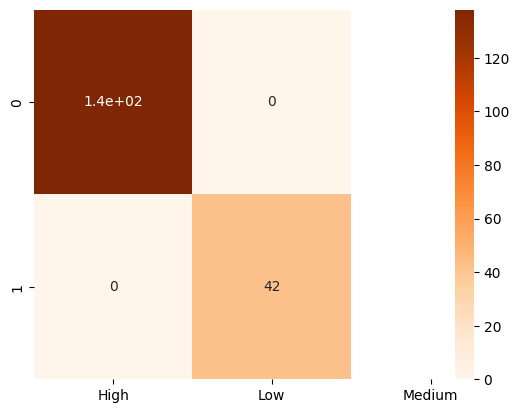

In [24]:
sns.heatmap(cm,annot=True,cmap="Oranges",xticklabels=["High","Low","Medium"])